# Shrinkage Filtering Visualizations

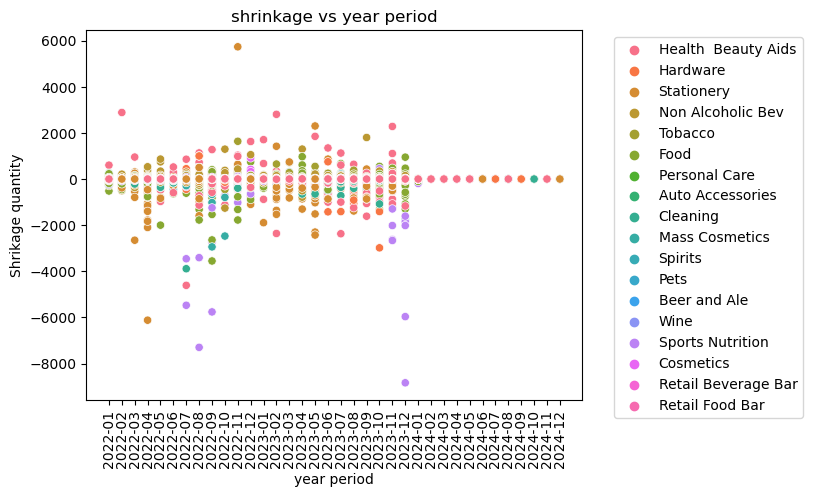

In [14]:
filtered_data = dcopy[cond]
create_visual(filtered_data["LOB_DESC"], filtered_data)

In [3]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv("INV_ADJ_ANAL.csv")

In [11]:
DDD = []

def create_dropdown(opts, caption='Col:'):
    dropdown = widgets.Dropdown(
        options=opts,
        value='-',
        description=caption,
        disabled=False,
    )
    dropdown.observe(on_dropdown_change, names='value')
    dropdown.ind = None
    return dropdown

def on_dropdown_change(change):
    for i, dd in enumerate(DDD):
        dd.ind = i
    if change['owner'].ind % 2:
        #VAL SELECTORS
        if change['new'] != '-':
            if change['owner'].ind == len(DDD)-1:
                opts = ['-'] + [q for q in data.columns]
                new_dropdown = create_dropdown(opts)
                display(new_dropdown)
                DDD.append(new_dropdown)
        else:
            pass
    else:
        #COL SELECTORS
        if change['new'] != '-':
            opts = ['-'] + data[change.new].unique().tolist()
            new_dropdown = create_dropdown(opts, 'Val:')
            display(new_dropdown)
            DDD.append(new_dropdown)
        else:
            DDD[change['owner'].ind + 1].close()
            del DDD[change['owner'].ind + 1]
            if change['owner'].ind != len(DDD)-1:
                DDD[change['owner'].ind].close()
                del DDD[change['owner'].ind]

def create_visual(feature, data):
    sns.scatterplot(x = data["PERIOD"], y = data["TY_QTY"], hue = feature, data = data)
    title = f"shrinkage vs year period"
    plt.title(title)
    plt.xlabel("year period")
    plt.ylabel(f"Shrikage quantity")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation='vertical')
    plt.show()
               

# Create the initial dropdown and display it
initial_dropdown = create_dropdown(opts = ['-'] + [q for q in data.columns])
DDD.append(initial_dropdown)

display(initial_dropdown)

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 'Surveys', 'Shrink', 'All Other', 'Reconciliation'), value='-')

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 'Consumables', 'Softlines', 'Hardlines', 'Comm Military', 'NON-RMS'…

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

In [12]:
dcopy = data
last = None
cond = True
for i, v in enumerate(DDD):
    if i % 2:
        cond &= (dcopy[last] == v.value)
    else:
        last = v.value
dcopy[cond]

,COMMAND_CD,SITE_ID,ADJUSTMENT_CATEGORY,DESCRIPTION,DIVISION,LOB_DESC,DEPT_DESC,CLASS,SUB_CLASS,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,PERIOD,TY_QTY,TY_VALUE,LY_QTY2,LY_VALUE2,LM_QTY3,LM_VALUE3
2,CPM,4100,Shrink,300-ON HAND CORRECTION,Consumables,Health Beauty Aids,HEALTH & BEAUTY AIDS,2100 - FOOT CARE,2102 - ANTIFUNGAL,2022,1,2022-01,-2,(5.98),-,-,-,-
18,TWM,13100,Shrink,300-ON HAND CORRECTION,Consumables,Hardware,GENERAL HARDWARE,1600 - NAILS/SCREWS/FASTENERS,1601 - NAILS/SCREWS/FASTENERS,2022,1,2022-01,-2,(11.98),-,-,-,-
23,CPM,4100,Shrink,300-ON HAND CORRECTION,Consumables,Stationery,STATIONERY SUPPLIES,1700 - PAPER PRODUCTS,1701 - MULTIPURPOSE PAPER,2022,1,2022-01,-6,(13.14),-,-,-,-
25,TWM,13100,Shrink,300-ON HAND CORRECTION,Consumables,Stationery,STATIONERY SUPPLIES,1700 - PAPER PRODUCTS,1701 - MULTIPURPOSE PAPER,2022,1,2022-01,-1,(10.99),-,-,-,-
26,TWM,13100,Shrink,300-ON HAND CORRECTION,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,3000 - ENHANCER DROPS,3002 - MIO,2022,1,2022-01,-1,(3.99),-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578142,TWM,13100,Shrink,300-ON HAND CORRECTION,Consumables,Stationery,STATIONERY SUPPLIES,1700 - PAPER PRODUCTS,1704 - NOTEBOOKS 8X11,2024,12,2024-12,0,-,1.00,0.99,-,-
578159,CLM,5303,Shrink,301-CYCLE COUNT,Consumables,Sports Nutrition,SPORT NUTRITION,1100 - SUPPLEMENTS,1102 - PROTEIN,2024,12,2024-12,0,-,-,-,-,-
578167,SCM,18100,Shrink,300-ON HAND CORRECTION,Consumables,Stationery,STATIONERY SUPPLIES,1700 - PAPER PRODUCTS,1705 - INDEX CARDS,2024,12,2024-12,0,-,(1.00),(0.59),-,-
578178,RDCE,60001,Shrink,1-OPERATIONAL,Consumables,Cleaning,Cleaning Supplies,1800 - HOUSEHOLD CLEANERS,1807 - ALL PURPOSE,2024,12,2024-12,0,-,"(1,738.00)","(5,891.82)",-,-


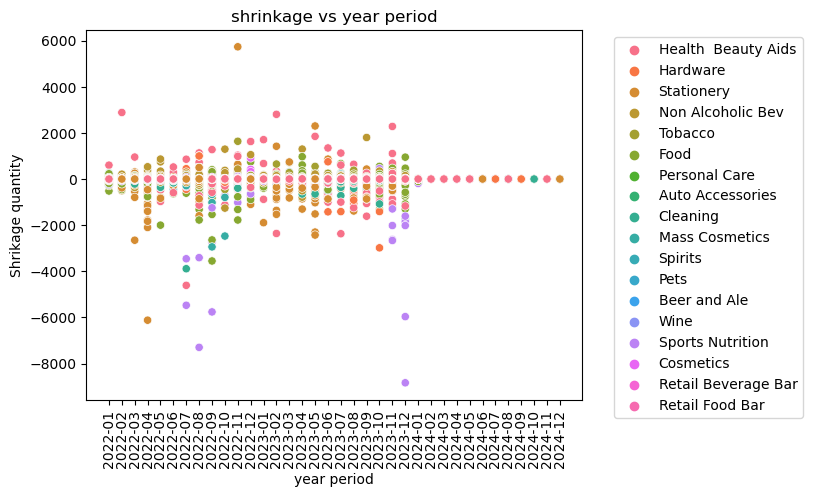

In [13]:
filtered_data = dcopy[cond]
create_visual(filtered_data["LOB_DESC"], filtered_data)